In [ ]:
import pandas as pd #Data manipulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
from sklearn.datasets import fetch_california_housing #Preprocessing ,cleaning ,modeling, data loading
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convert to pandas DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

In [ ]:
# Print basic information about the dataset
print("Boston Housing Dataset Shape:", df.shape)
print("\nFeatures Description:")
for i, feature in enumerate(housing.feature_names):
    print(f"{i+1}. {feature}")

print("\nFirst 5 rows of the dataset:")
print(df.head())

Boston Housing Dataset Shape: (20640, 9)

Features Description:
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. Latitude
8. Longitude

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
# Basic statistics of the dataset
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.

In [ ]:
# Correlation with target variable (PRICE)
print("\nCorrelation with PRICE:")
correlations = df.corr()['PRICE'].sort_values(ascending=False)
print(correlations)


Correlation with PRICE:
PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


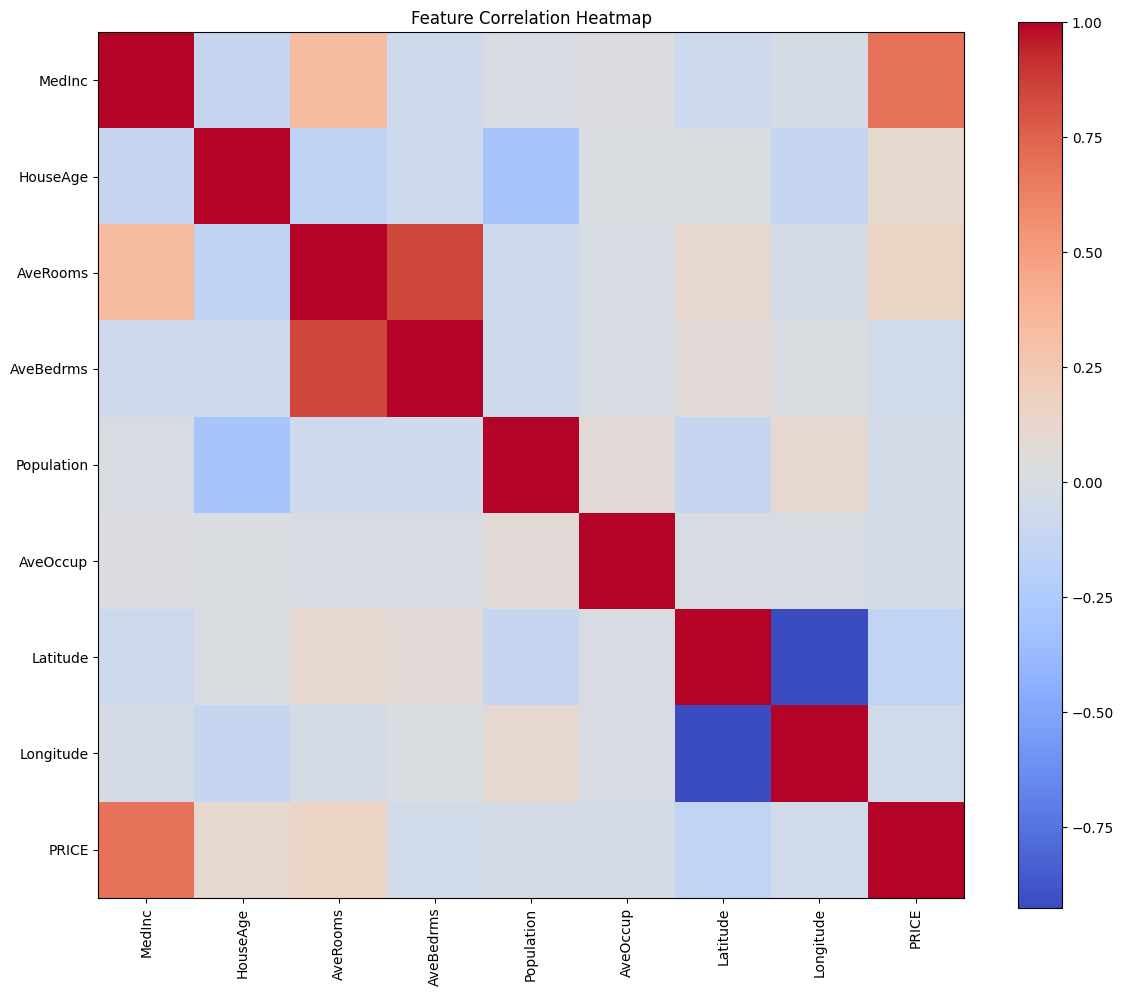

In [ ]:
# Create a correlation heatmap visualization
plt.figure(figsize=(12, 10))
plt.title('Feature Correlation Heatmap')
plt.imshow(df.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

In [ ]:
# Split features and target variable
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) #centering and scaling


In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation:
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R² Score: 0.5758


In [ ]:
# # Feature importance (coefficients)
# coef_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Coefficient': model.coef_
# }).sort_values(by='Coefficient', ascending=False)

# print("\nFeature Importance (Coefficients):")
# print(coef_df)


Feature Importance (Coefficients):
      Feature  Coefficient
0      MedInc     0.854383
3   AveBedrms     0.339259
1    HouseAge     0.122546
4  Population    -0.002308
5    AveOccup    -0.040829
2    AveRooms    -0.294410
7   Longitude    -0.869842
6    Latitude    -0.896929


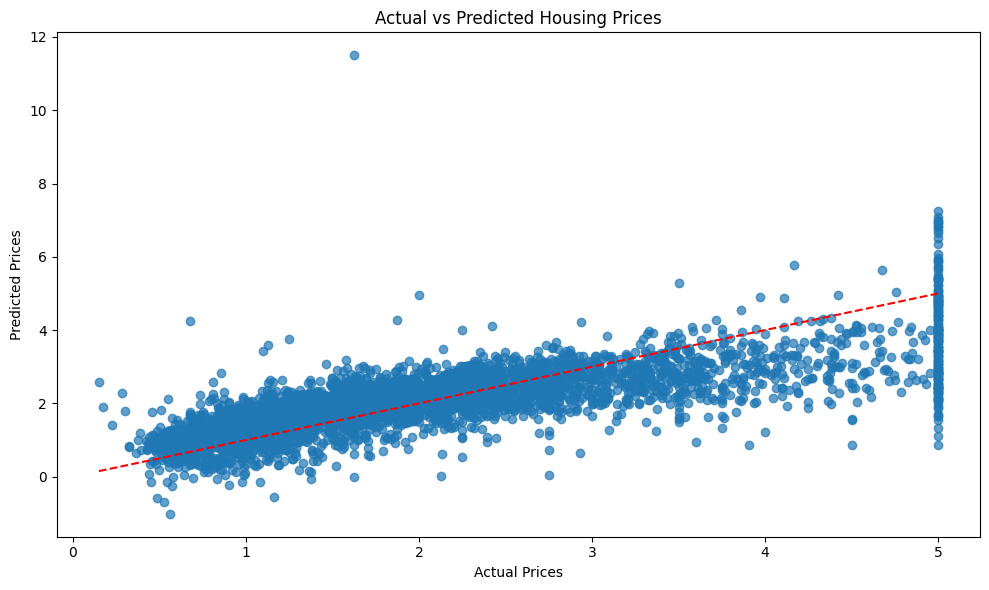

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')



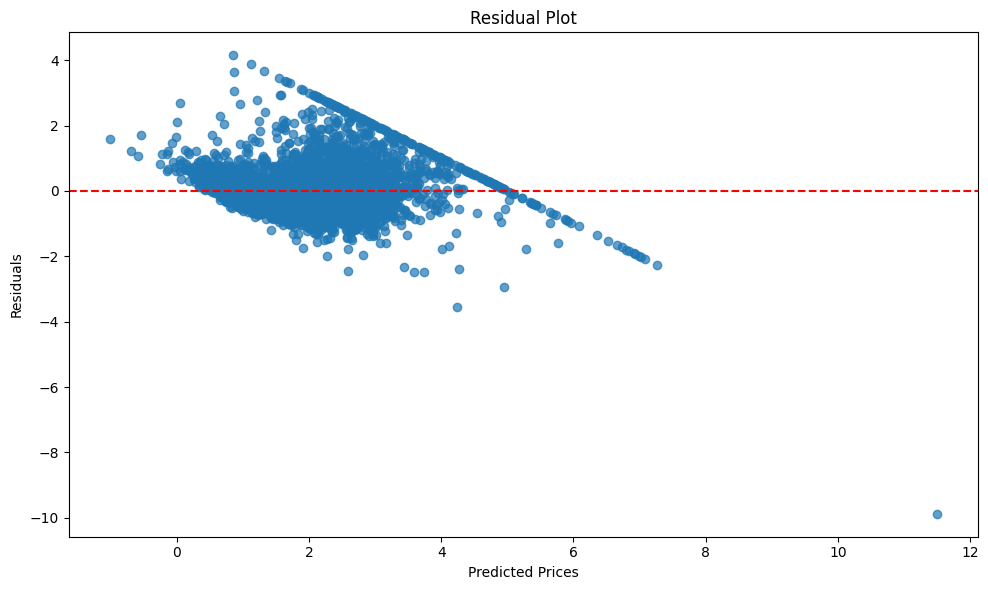

In [ ]:
# Visualize residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.savefig('residuals.png')




Model Training and Evaluation Complete!


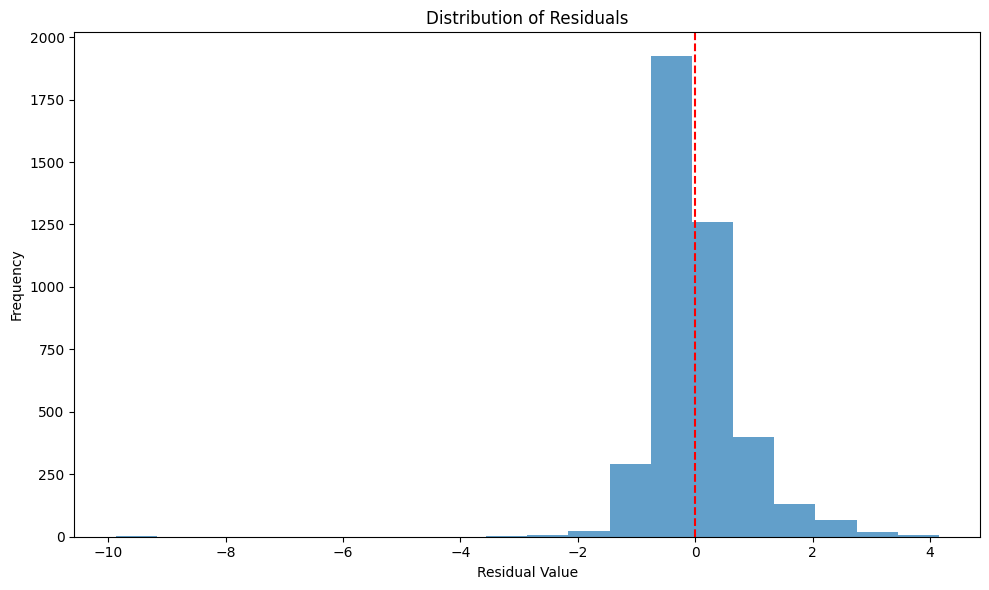

In [ ]:
# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.savefig('residual_distribution.png')

print("\nModel Training and Evaluation Complete!")